# ERIS ALFIONITA | 24083010032

## Permasalahan: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

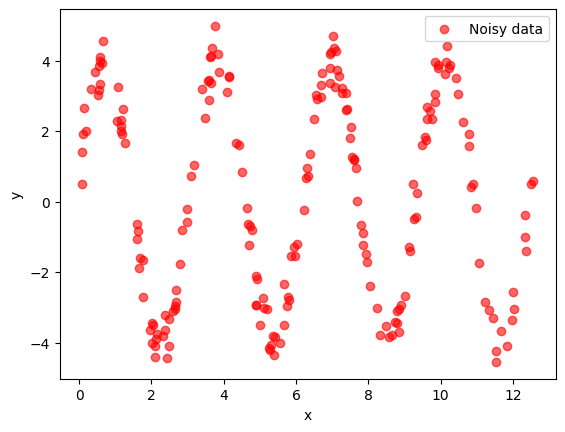

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 200
NPM= 32

# Generate random x values between 0 and 4π
np.random.seed(32)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
# plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Penyelesaian

Polynomial degree 20 MSE : 0.022683
Fourier series (k=5) MSE : 0.010516
Sinusoidal fit       MSE : 0.000750


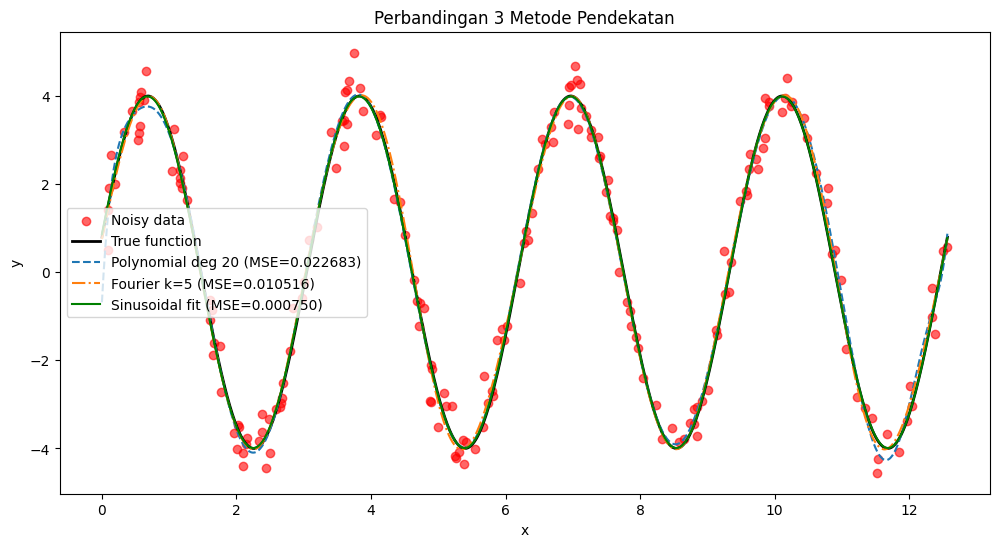

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ------------------------
# Data Preparation
# ------------------------
n = 200
np.random.seed(32)
x = np.random.uniform(0, 4*np.pi, n)

# True function
def true_func(x):
    return 4 * np.sin(2*x + 0.2)

y_true = true_func(x)

# Add noise
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Grid for smooth plotting
x_fit = np.linspace(0, 4*np.pi, 1000)
y_true_fit = true_func(x_fit)

# ------------------------
# 1. Polynomial fit (degree 20)
# ------------------------
coeffs = np.polyfit(x, y_noisy, 20)
poly20 = np.poly1d(coeffs)
y_poly20 = poly20(x_fit)
mse_poly20 = np.mean((y_true_fit - y_poly20)**2)

# ------------------------
# 2. Fourier series fit (order k=5)
# ------------------------
def fourier_series(x, *a):
    k = (len(a)-1)//2
    ret = a[0]
    for i in range(1, k+1):
        ret += a[2*i-1]*np.sin(i*x) + a[2*i]*np.cos(i*x)
    return ret

popt_fourier, _ = curve_fit(lambda x, *a: fourier_series(x, *a),
                            x, y_noisy, p0=[0]*(2*5+1))
y_fourier = fourier_series(x_fit, *popt_fourier)
mse_fourier = np.mean((y_true_fit - y_fourier)**2)

# ------------------------
# 3. Sinusoidal regression
# ------------------------
def sinusoidal(x, A, B, C):
    return A * np.sin(B*x + C)

popt_sin, _ = curve_fit(sinusoidal, x, y_noisy, p0=[4, 2, 0])
y_sin = sinusoidal(x_fit, *popt_sin)
mse_sin = np.mean((y_true_fit - y_sin)**2)

# ------------------------
# Print results
# ------------------------
print(f"Polynomial degree 20 MSE : {mse_poly20:.6f}")
print(f"Fourier series (k=5) MSE : {mse_fourier:.6f}")
print(f"Sinusoidal fit       MSE : {mse_sin:.6f}")

# ------------------------
# Plot
# ------------------------
plt.figure(figsize=(12,6))
plt.scatter(x, y_noisy, color="red", alpha=0.6, label="Noisy data")
plt.plot(x_fit, y_true_fit, "k", linewidth=2, label="True function")

plt.plot(x_fit, y_poly20, "--", label=f"Polynomial deg 20 (MSE={mse_poly20:.6f})")
plt.plot(x_fit, y_fourier, "-.", label=f"Fourier k=5 (MSE={mse_fourier:.6f})")
plt.plot(x_fit, y_sin, "g", label=f"Sinusoidal fit (MSE={mse_sin:.6f})")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Perbandingan 3 Metode Pendekatan")
plt.legend()
plt.show()

pada grafik dapat dilihat bahwa metode Polynomial degree tinggi bisa mendekati fungsi, namun berisiko osilasi dan menyebabkan overfitting.

Semetara, metode Fourier series lebih baik untuk data periodik, stabil dengan error kecil. Walaupun demikian, masih ada sedikit perbedaan pada titik-titik ekstrem.

Kemudian untuk metode Sinusoidal regression adalah metode yang paling tepat dan akurat, karena langsung memodelkan struktur fungsi sinusoidal. Hal ini juga dibuktikan dari hasil MSE terkecil ada pada metode Sinusoidal regression. Artinya metode ini adalah yang paling cocok.

Parameter hasil fitting: A=3.991, B=1.998, C=0.218

Nilai fungsi hasil fitting:
x = 0.000, y = 0.865
x = 1.396, y = 0.530
x = 2.793, y = -1.860
x = 4.189, y = 2.962
x = 5.585, y = -3.702
x = 6.981, y = 3.989
x = 8.378, y = -3.788
x = 9.774, y = 3.124
x = 11.170, y = -2.078
x = 12.566, y = 0.777


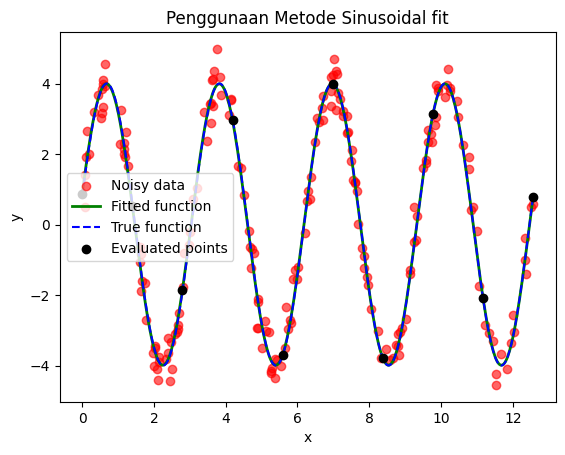

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Jumlah data
n = 200
np.random.seed(32)

# Data
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Model sinus
def model(x, A, B, C):
    return A * np.sin(B*x + C)

# Fitting parameter
params, covariance = curve_fit(model, x, y_noisy, p0=[3, 2, 0])
A_fit, B_fit, C_fit = params
print(f"Parameter hasil fitting: A={A_fit:.3f}, B={B_fit:.3f}, C={C_fit:.3f}")

# Titik evaluasi fungsi
x_eval = np.linspace(0, 4*np.pi, 10)   # misal ambil 10 titik
y_eval = model(x_eval, A_fit, B_fit, C_fit)

print("\nNilai fungsi hasil fitting:")
for xi, yi in zip(x_eval, y_eval):
    print(f"x = {xi:.3f}, y = {yi:.3f}")

# Plot untuk visualisasi
x_fit = np.linspace(0, 4*np.pi, 500)
y_fit = model(x_fit, A_fit, B_fit, C_fit)

plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
plt.plot(x_fit, y_fit, label="Fitted function", color="green", linewidth=2)
plt.plot(x_fit, 4*np.sin(2*x_fit + 0.2), label="True function", color="blue", linestyle="--")
plt.scatter(x_eval, y_eval, color="black", zorder=5, label="Evaluated points")
plt.title("Penggunaan Metode Sinusoidal fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Interpretasi Hasil Sinusoidal Fit

Fungsi hasil fitting adalah:

𝑓
(
𝑥
)
≈
3.991
⋅
sin
⁡
(
1.998
𝑥
+
0.218
)

f(x)≈3.991⋅sin(1.998x+0.218)

Hasil parameter sangat dekat dengan fungsi asli =
4
sin
⁡
(
2
𝑥
+
0.2
)
4sin(2x+0.2).

amplitudo

A = 3.991 ≈ 4
A=3.991 ≈4

Frekuensi

𝐵=
1.998
≈
2
B=1.998≈2

Fase

𝐶=
0.218
≈
0.2
C=0.218≈0.2

### Grafik menunjukkan bahwa kurva hasil fitting hampir identik dengan fungsi asli, bahkan titik evaluasi (hitam) jatuh sangat dekat dengan kurva biru (true function).

# Analisis Metode Sinusoidal Fit

**Kelebihan Sinusoidal Fit**

- Sangat akurat untuk data berbentuk periodik sinusoidal → terbukti dari parameter yang hampir sama dengan fungsi asli dan MSE terkecil.
- Stabil terhadap noise, karena fitting berusaha menangkap pola umum, bukan mengikuti fluktuasi acak.
- Parameter bermakna secara fisik (amplitudo, frekuensi, fase), sehingga mudah diinterpretasikan.
- Komputasi ringan, hanya perlu estimasi 3 parameter utama.

**Kekurangan Sinusoidal Fit**

- Hanya cocok untuk data sinusoidal → kalau pola datanya tidak sinusoidal, model ini gagal.
- Sulit jika data sangat bising → noise besar bisa menggeser estimasi amplitudo/frekuensi.
- Butuh tebakan awal (initial guess) → kalau tebakan awal jauh dari nilai sebenarnya, fitting bisa gagal konvergen.
- Kurang fleksibel dibanding metode umum seperti polinomial atau Fourier, karena terbatas pada bentuk sinusoidal tunggal.

**Kesimpulan:**

Berdasarkan perbandingan dengan metode lain, sinusoidal fit adalah metode terbaik untuk kasus ini. Metode ini mampu mengembalikan fungsi asli dengan akurasi tinggi, error sangat kecil, serta parameter yang mudah diinterpretasikan. Namun, keunggulannya sangat spesifik untuk data sinusoidal; jika pola data berbeda, metode ini tidak relevan.